# <div style="text-align:center; color:red"> Arline Arrivals  </div> #

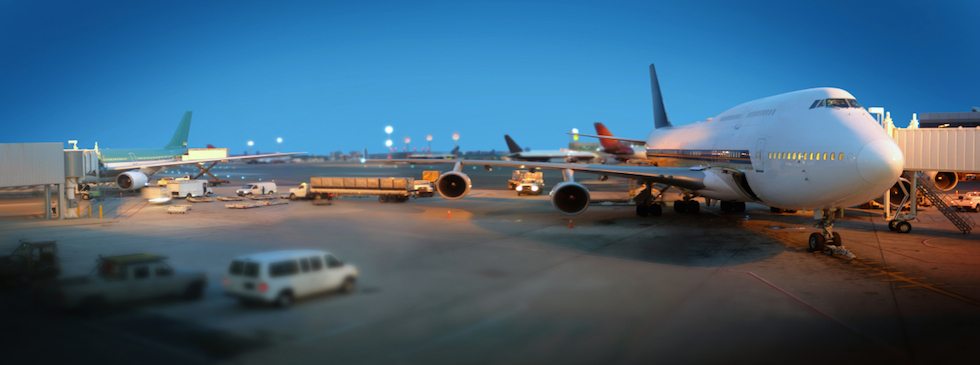

In [1]:
from IPython.display import Image
Image("fl.jpg", width=1000, height=10, )

+ Models included: Logistic Regression, Suport Vector Machine, Naive Bayes, Random Forest
+ Feature Selections: SelectKBest, PCA

We apply each feature selection methods on each models to evaluate. 
Classify if flights arrive late, early or on time.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data_num.csv')

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
pd.set_option('display.max_columns',None)
data.head().T

,0,1,2,3,4
Month,1.0,1.0,1.0,1.0,1.0
DayofMonth,3.0,3.0,3.0,3.0,3.0
DayOfWeek,4.0,4.0,4.0,4.0,4.0
ActualElapsedTime,128.0,128.0,96.0,88.0,90.0
CRSElapsedTime,150.0,145.0,90.0,90.0,90.0
AirTime,116.0,113.0,76.0,78.0,77.0
ArrDelay,-14.0,2.0,14.0,-6.0,34.0
DepDelay,8.0,19.0,8.0,-4.0,34.0
Distance,810.0,810.0,515.0,515.0,515.0
TaxiIn,4.0,5.0,3.0,3.0,3.0


In [6]:
data.shape

(6855029, 46)

Day la data sau khi da duoc clean va one-hot encode, voi 6.8M samples, 45 features va 1 target **ArrivedLate** da duoc tao them tu cot **ArrDelay** voi:
+ **-1: early** chuyen bay dap som danh cho ArrDelay co value < 0
+  **0: ok** chuyen bay dap dung gio danh cho ArrDelay co value < 30
+ **1: late** chuyen bay dap tre danh cho ArrDelay co value >= 30

In [7]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Month,6855029.0,6.388525,3.398833,1.0,3.0,6.0,9.0,12.0
DayofMonth,6855029.0,15.738258,8.801086,1.0,8.0,16.0,23.0,31.0
DayOfWeek,6855029.0,3.925802,1.988459,1.0,2.0,4.0,6.0,7.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0
CRSElapsedTime,6855029.0,129.077814,69.532711,-141.0,80.0,111.0,159.0,660.0
AirTime,6855029.0,104.018589,67.439796,0.0,55.0,86.0,132.0,1350.0
ArrDelay,6855029.0,8.168452,38.501937,-519.0,-10.0,-2.0,12.0,2461.0
DepDelay,6855029.0,9.923845,35.203863,-534.0,-4.0,-1.0,8.0,2467.0
Distance,6855029.0,728.743834,563.244731,11.0,326.0,581.0,954.0,4962.0
TaxiIn,6855029.0,6.860150,4.931224,0.0,4.0,6.0,8.0,308.0


In [8]:
data.ArrivedLate.hist()

Da so chuyen bay dap som, trong tap du lieu thi co khoang 1000000 chuyen bay dap tre. Day la class-imbalance, se duoc tune trong nhung model su dung.

In [9]:
X = data.drop(columns=['ArrivedLate','ArrDelay'])
y = data['ArrivedLate']

In [10]:
X.shape

(6855029, 44)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit_transform(X)

# Logistic Regression #

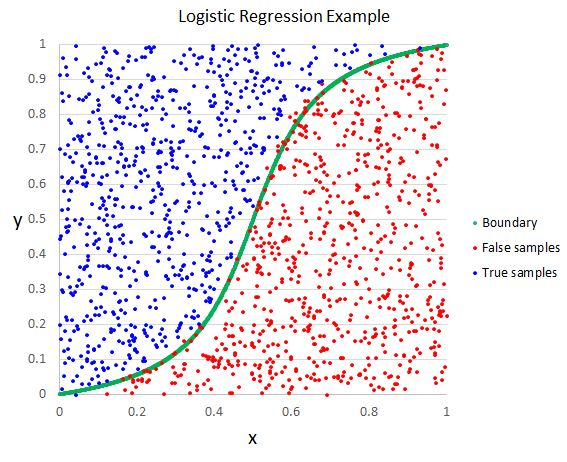

In [12]:
Image("lr.jpg", width=500, height=10, )

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

## SelectKBest ##

In [14]:
selector = SelectKBest(f_classif, k=20)
selector.fit(X, y)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [10] are constant.
  UserWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=20, score_func=<function f_classif at 0x000001E8A02B2158>)

In [15]:
X_KB = selector.transform(X)

In [16]:
X.columns[selector.get_support()]

Index(['Month', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'LateAircraftDelay', 'CRSDepTime_evening', 'CRSDepTime_morning',
       'CRSArrTime_evening', 'CRSArrTime_morning', 'CRSArrTime_night',
       'CRSArrTime_noon', 'UniqueCarrier_AA', 'UniqueCarrier_US',
       'UniqueCarrier_WN'],
      dtype='object')

In [17]:
y.value_counts(dropna=False)

-1    3690606
 0    2237008
 1     927415
Name: ArrivedLate, dtype: int64

Ro rang class dang unbalance, minh se them argument: class_weight de pass vao model:

In [18]:
class_weight = {
    -1:36,
     0:22,
     1:9
}

In [19]:
logreg = LogisticRegression(C=0.5,class_weight=class_weight)

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X_KB, y, test_size=0.2, random_state=42)

In [21]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={-1: 36, 0: 22, 1: 9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      early       1.00      1.00      1.00    738394
         ok       1.00      1.00      1.00    447121
       late       1.00      0.99      1.00    185491

avg / total       1.00      1.00      1.00   1371006



Ket qua nhan duoc tren toan bo dataset la hoan hao sau khi tuning C va them argument class weight, toc do train rat nhanh

## PCA ##

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
ratio = 0
for i, evr in enumerate(pca.explained_variance_ratio_):
    ratio += evr
    print('The first', i+1, ' features has the total evr of ', ratio) 

The first 1  features has the total evr of  0.990112168547835
The first 2  features has the total evr of  0.9949600690235046
The first 3  features has the total evr of  0.996792539485851
The first 4  features has the total evr of  0.9979771494013702
The first 5  features has the total evr of  0.9987271496990344
The first 6  features has the total evr of  0.9990996753236233
The first 7  features has the total evr of  0.9994015554009208
The first 8  features has the total evr of  0.9996333239436895
The first 9  features has the total evr of  0.9998252209016074
The first 10  features has the total evr of  0.9999159449992635
The first 11  features has the total evr of  0.9999507193041253
The first 12  features has the total evr of  0.9999792926736996
The first 13  features has the total evr of  0.9999911120035052
The first 14  features has the total evr of  0.99999332728472
The first 15  features has the total evr of  0.9999950225450343
The first 16  features has the total evr of  0.999996

O vector dau tien da the hien ratio rat tot, (99%), o day se lay 5 vectors.

In [25]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
X_PCA = pca.transform(X)

In [27]:
X_PCA.shape

(6855029, 5)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

In [29]:
logreg = LogisticRegression(C=0.5,class_weight=class_weight)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      early       0.77      0.98      0.86    738394
         ok       0.88      0.50      0.64    447121
       late       0.94      0.92      0.93    185491

avg / total       0.83      0.81      0.80   1371006



Ket qua cung kha tot, tuy khong tot bang SelectKBest

# Support Vector Machine #

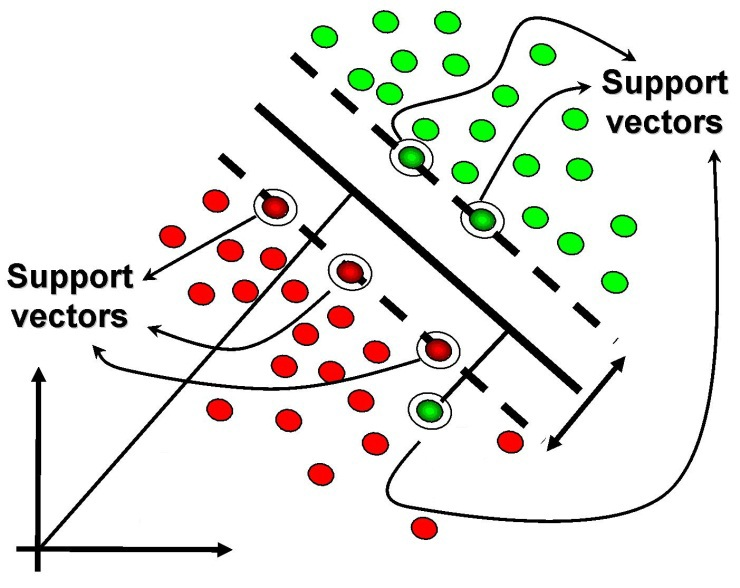

In [30]:
Image("SVM.jpg", width=500, height=10, )

In [31]:
from sklearn.svm import SVC

## SelectKBest ##

In [32]:
X_KB = pd.DataFrame(X_KB)
data_KB = X_KB.join(y)

In [33]:
data_KB.shape

(6855029, 21)

In [34]:
data_KB_tune = data_KB.sample(100000)

In [35]:
X_KB_tune = data_KB_tune.drop(columns=['ArrivedLate'])
y_KB_tune = data_KB_tune['ArrivedLate']

In [36]:
y_KB_tune.value_counts(dropna=False)

-1    53598
 0    32772
 1    13630
Name: ArrivedLate, dtype: int64

In [37]:
class_weight_KB_tune = {
    -1: 5,
     0: 3,
     1: 1
}

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_KB_tune, y_KB_tune, test_size=0.2, random_state=42)

In [39]:
svc = SVC(kernel='linear', C=2, class_weight=class_weight_KB_tune)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      early       1.00      1.00      1.00     10673
         ok       1.00      1.00      1.00      6564
       late       1.00      1.00      1.00      2763

avg / total       1.00      1.00      1.00     20000



Ket qua rat tot va chay rat nhanh voi sample nho, se dung de lam tren population tuy nhien SVM chay qua lau, da thu train = cac loai kernel khac nhung qua lau

## PCA ##

In [40]:
X_PCA = pd.DataFrame(X_PCA)
data_PCA = X_PCA.join(y)
data_PCA.shape

(6855029, 6)

In [41]:
data_PCA_tune = data_PCA.sample(100000)
X_PCA_tune = data_PCA_tune.drop(columns=['ArrivedLate'])
y_PCA_tune = data_PCA_tune['ArrivedLate']
y_KB_tune.value_counts(dropna=False)

-1    53598
 0    32772
 1    13630
Name: ArrivedLate, dtype: int64

In [42]:
class_weight_PCA_tune = {
    -1: 5,
     0: 3,
     1: 1
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA_tune, y_PCA_tune, test_size=0.2, random_state=42)

In [ ]:
svc = SVC(kernel='linear', C=2, class_weight=class_weight_PCA_tune)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

Mot lan nua ket qua cung kha tot, nhung PCA van chua co performance tot bang SelectKBest nhu voi model Logistic Regression va train rat rat lau

# Naive Bayes #

In [ ]:
Image("NB.png", width=500, height=10, )

## SelectKBest ##

In [ ]:
X_scaled = MinMaxScaler(feature_range=(0,100)).fit_transform(X)

Vi MultinomialNB() yeu cau input >= 0 nen phai scale lai X truoc roi su dung KBest de lua chon feature train

In [ ]:
selector = SelectKBest(f_classif, k=20)
selector.fit(X_scaled, y)

In [ ]:
X_scaled_KB = selector.transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_KB, y, test_size=0.2, random_state=42)

In [ ]:
class_prior = [0.54, 0.32, 0.14]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.00000001, class_prior=class_prior)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

Da thu tune rat nhieu *alpha* va *class_prior* tuy nhien day la ket qua tot nhat dat duoc, model nay khong thich hop de lam cho du lieu nay.

## PCA ##

In [ ]:
pca = PCA(n_components=35)
pca.fit(X_scaled)

In [ ]:
ratio = 0
for i, evr in enumerate(pca.explained_variance_ratio_):
    ratio += evr
    print('The first', i+1, ' features has the total evr of ', ratio) 

Sau khi scaled thi 29 vector dau tien co le chua du thong tin cua ma tran X

In [ ]:
pca = PCA(n_components=29)
pca.fit(X_scaled)
X_scaled_PCA = pca.transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_PCA, y, test_size=0.2, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

do Model NB yeu cau X >= 0 nen ko the giam dimension = PCA

# Random Forest #

In [ ]:
from IPython.display import Image
Image("forests.jpg", width=500, height=10, )

## SelectKBest ##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=15, max_depth=100, 
                            min_samples_split=4, min_samples_leaf=3,
                            random_state=42, class_weight=class_weight)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_KB, y, test_size=0.2, random_state=42)

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

Ket qua dat duoc la hoan hao, toc do train nhanh.

## PCA ##

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=15, max_depth=100, 
                            min_samples_split=4, min_samples_leaf=3,
                            random_state=42, class_weight=class_weight)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
target_names = ['early', 'ok', 'late']
print(classification_report(y_test, y_pred, target_names=target_names))

Ket qua dat duoc rat tot, tuy nhien mot lan nua PCA van khong tot bang SelectKBest

# Conclusion on models #
+ SelectKBest has higher performance than PCA in all of the cases
+ Performance rank (on this dataset): RandomForest > LogisticRegression > SVM > NaiveBayes
+ Fast train-time rank: NaiveBayes > LogisticRegression > RandomForest >>> SVM